# Import

In [7]:
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

import numpy as np
from tqdm import tqdm


# Environnement

In [19]:
argent = 100

cote_min = 1.05
cote_max = 1.4

prediction_rate = 0.6

bet_proportion = 0.1

multiplicateur = 2
amount_to_stop = argent*multiplicateur

# Jeu

In [9]:
def plot(list_to_plot):
        clear_output(True)
        plt.figure(figsize=(15,3))
        plt.subplot(131)
        plt.plot(list_to_plot, marker='s', markersize=10)
        plt.grid()
        # plt.pause(0.5)
        plt.show()

def make_a_bet(argent):
     
    amount_to_bet = int(argent*bet_proportion) + 1
    # print(amount_to_bet)

    if random.random() < prediction_rate:
        return argent + round(amount_to_bet*random.uniform(cote_min, cote_max), 2)
    else:
         return argent - amount_to_bet
          

def jouer(argent, affichage):

    memory_argent = [argent]

    while argent > 1 and argent < amount_to_stop:

        if affichage == True:
            plot(memory_argent)

        argent = make_a_bet(argent)

        memory_argent.append(argent)

    
    return argent, len(memory_argent)



# Main

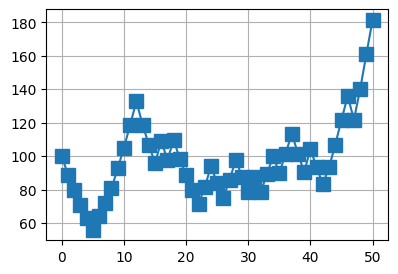

(203.86, 52)

In [22]:
jouer(argent, affichage=True)

In [20]:
list_day = []
nb_simulation = 100000
nb_defaite = 0

for _ in tqdm(range(nb_simulation)):
    result, day = jouer(argent, False)
    if result < 1:
        nb_defaite += 1
    
    list_day.append(day)

print(f"Pourcentage de réussite du ")
print(f"Moyenne de paris pour faire x{multiplicateur} : {sum(list_day)/len(list_day)}")
print(f"Pourcentage  de réusite : {1 - nb_defaite/nb_simulation}")

100%|██████████| 100000/100000 [00:01<00:00, 65031.99it/s]

Pourcentage de réussite du 
Moyenne de paris pour faire x2 : 27.54296
Pourcentage  de réusite : 1.0
